In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data_path = "sascha/data/superstore_noid.csv"
temp = pd.read_csv(data_path)
df = pd.DataFrame(temp)

In [7]:
df.shape
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Demand based on sales
To first make a demand pattern analysis on product, which is to see which product produce the most sales (based on quantity and sales of each order), drop other unrelated columns (based on pre-knowledge).

In [9]:
columns_to_drop = [
    "Order ID",
    "Ship Date",
    "Ship Mode",
    "Customer ID",
    "Customer Name",
    "Segment",
    "Country",
    "City",
    "State",
    "Postal Code",
    "Region",
    "Sub-Category",
    "Product Name",
    "Discount",
    "Profit",
    "Order Date",
]

# Drop the specified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned dataframe
print(df_cleaned.head())

        Product ID         Category     Sales  Quantity
0  FUR-BO-10001798        Furniture  261.9600         2
1  FUR-CH-10000454        Furniture  731.9400         3
2  OFF-LA-10000240  Office Supplies   14.6200         2
3  FUR-TA-10000577        Furniture  957.5775         5
4  OFF-ST-10000760  Office Supplies   22.3680         2


In [13]:
# Group by 'Product ID' and sum the 'Sales' and 'Quantity' columns
grouped_df = df_cleaned.groupby("Product ID", as_index=False).agg({"Sales": "sum", "Quantity": "sum"})

# Display the grouped dataframe
grouped_df.head()

,Product ID,Sales,Quantity
0,FUR-BO-10000112,825.174,9
1,FUR-BO-10000330,1064.624,10
2,FUR-BO-10000362,2154.348,14
3,FUR-BO-10000468,723.842,21
4,FUR-BO-10000711,851.760,12


## Since there are only two attributes, might not be necessary to do PCA

In [15]:
data = grouped_df[["Sales", "Quantity"]]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_data)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(normalized_data)

# Add the cluster labels back to the original data
grouped_df["KMeans_Cluster"] = kmeans_labels
grouped_df["DBSCAN_Cluster"] = dbscan_labels

# Display the dataframe with added cluster labels
print(grouped_df.head())

        Product ID     Sales  Quantity  KMeans_Cluster  DBSCAN_Cluster
0  FUR-BO-10000112   825.174         9               0               0
1  FUR-BO-10000330  1064.624        10               0               0
2  FUR-BO-10000362  2154.348        14               0               0
3  FUR-BO-10000468   723.842        21               0               0
4  FUR-BO-10000711   851.760        12               0               0


In [20]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1862 non-null   object 
 1   Sales           1862 non-null   float64
 2   Quantity        1862 non-null   int64  
 3   KMeans_Cluster  1862 non-null   int32  
 4   DBSCAN_Cluster  1862 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 65.6+ KB


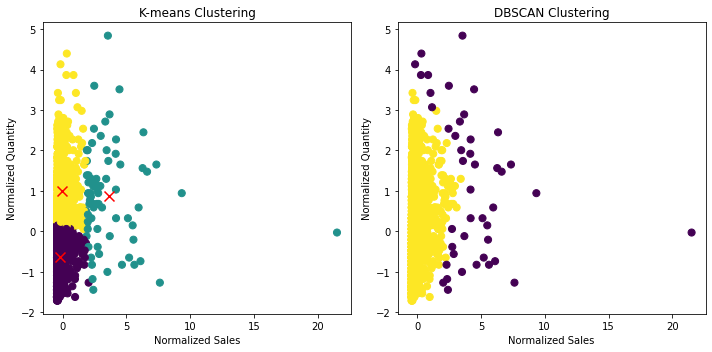

In [18]:
# Plot K-means clusters
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title('K-means Clustering')
plt.xlabel('Normalized Sales')
plt.ylabel('Normalized Quantity')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Normalized Sales')
plt.ylabel('Normalized Quantity')

plt.tight_layout()
plt.show()

In [21]:
# Calculate mean sales for each K-means cluster
kmeans_cluster_means = grouped_df.groupby("KMeans_Cluster")["Sales"].mean()
print("Mean Sales for K-means Clusters:")
print(kmeans_cluster_means)

print("\n")

# Calculate mean sales for each DBSCAN cluster
dbscan_cluster_means = grouped_df.groupby("DBSCAN_Cluster")["Sales"].mean()
print("Mean Sales for DBSCAN Clusters:")
print(dbscan_cluster_means)

Mean Sales for K-means Clusters:
KMeans_Cluster
0      631.730447
1    11385.714653
2     1130.386792
Name: Sales, dtype: float64


Mean Sales for DBSCAN Clusters:
DBSCAN_Cluster
-1    13245.396525
 0      943.016179
Name: Sales, dtype: float64


In [22]:
# Calculate mean quantity for each K-means cluster
kmeans_cluster_quantity_means = grouped_df.groupby("KMeans_Cluster")["Quantity"].mean()
print("Mean Quantity for K-means Clusters:")
print(kmeans_cluster_quantity_means)

print("\n")

# Calculate mean quantity for each DBSCAN cluster
dbscan_cluster_quantity_means = grouped_df.groupby("DBSCAN_Cluster")["Quantity"].mean()
print("Mean Quantity for DBSCAN Clusters:")
print(dbscan_cluster_quantity_means)


Mean Quantity for K-means Clusters:
KMeans_Cluster
0    13.235035
1    30.256757
2    31.593558
Name: Quantity, dtype: float64


Mean Quantity for DBSCAN Clusters:
DBSCAN_Cluster
-1    34.204545
 0    20.004400
Name: Quantity, dtype: float64


Based on the clustering results and the mean Sales and Quantity for each cluster, you can derive some insights for inventory management:

K-means Clusters:

+ Cluster 0: These products have relatively low sales (average sales of 631.73) and low quantity (average quantity of 13.24). We can consider this group as low-demand products. For these products, we can keep a smaller inventory and monitor the demand closely to avoid overstocking.
+ Cluster 1: These products have high sales (average sales of 11,385.71) and medium quantity (average quantity of 30.26). These are high-demand products that generate significant revenue. It's essential to ensure that you have sufficient inventory for these products to meet customer demand and not miss out on sales opportunities.
+ Cluster 2: These products have moderate sales (average sales of 1,130.39) and high quantity (average quantity of 31.59). These products can be considered as medium-demand products. K-means Cluster 2 has a high average quantity (31.59) but relatively lower sales (1,130.39) compared to Cluster 1. This indicates that products in Cluster 2 may have a lower price per unit or sell in larger quantities per transaction than those in Cluster 1. Implement inventory optimization techniques, such as reorder point and economic order quantity (EOQ), to minimize inventory costs and maintain an optimal stock level for these products. Review the pricing strategy for these products. If they have a lower profit margin due to lower price per unit, you might consider adjusting the pricing to increase profitability, provided it doesn't negatively impact demand. Might be able to negotiate better deals with suppliers for products in Cluster 2, given their higher average quantity. This can help reduce the cost per unit and improve the overall profitability of these products.

DBSCAN:

+ Cluster -1 (Noise points): These products have very high sales (average sales of 13,245.40) and high quantity (average quantity of 34.20). This cluster consists of products that do not fit well into the other clusters, which might represent outliers or unique products with specific demand patterns. These outliers could have more analysis and might be able to increase stocking of these products 
+ Cluster 0: These products have moderate sales (average sales of 943.02) and moderate quantity (average quantity of 20.00). This group can be considered as medium-demand products. For these products, you can maintain a balanced inventory level and closely monitor the demand trends to adjust inventory accordingly.

## Trying another approach that might not remove too much columns as above

In [24]:
# Convert 'Order Date' and 'Ship Date' columns to datetime data type
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create new features 'Shipping Time', 'Month', and 'Year'
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

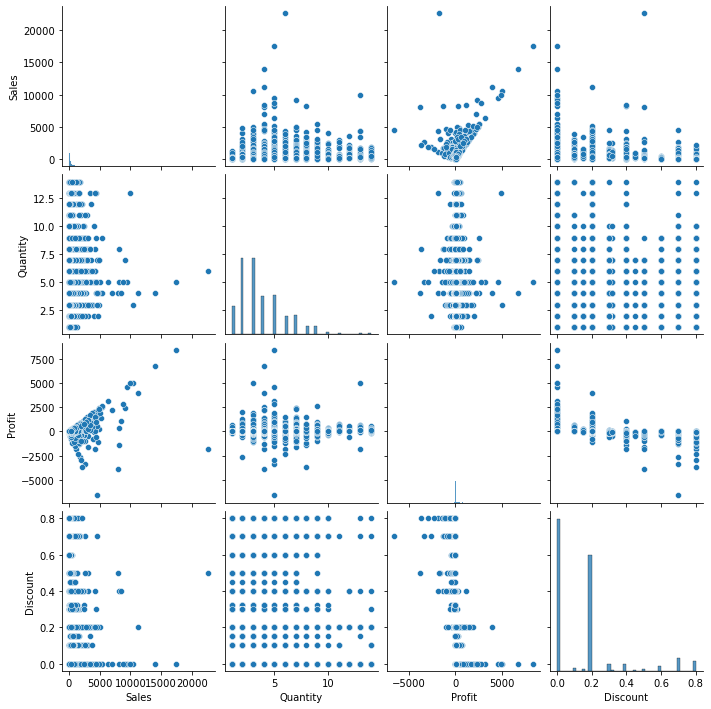

In [29]:
# Exploratory Data Analysis (EDA)

# Analyze the distribution of sales, quantity, profit, and discount
sns.pairplot(df, vars=['Sales', 'Quantity', 'Profit', 'Discount'])
plt.show()

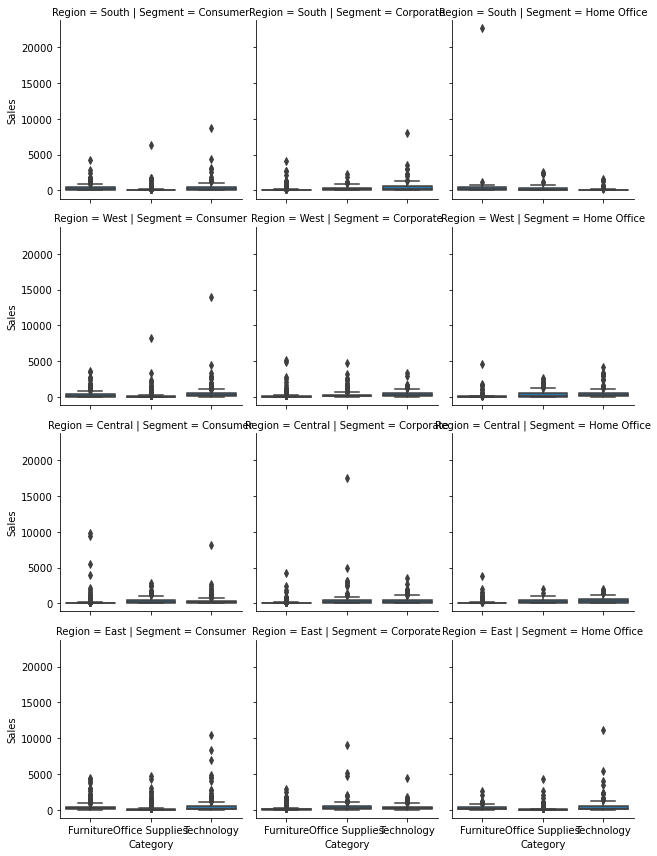

In [30]:
# Analyze sales, quantity, and profit trends by product categories, sub-categories, regions, and customer segments
g = sns.FacetGrid(df, col='Segment', row='Region')
g.map_dataframe(sns.boxplot, x='Category', y='Sales')
plt.show()

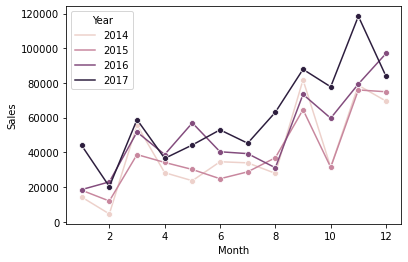

In [31]:
# Investigate seasonal trends in sales and quantity
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.show()

## Customer Segmentation

In [32]:
# Calculate Recency, Frequency, and Monetary (RFM) values
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Monetary'
})

# Normalize RFM values and apply K-means clustering
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)

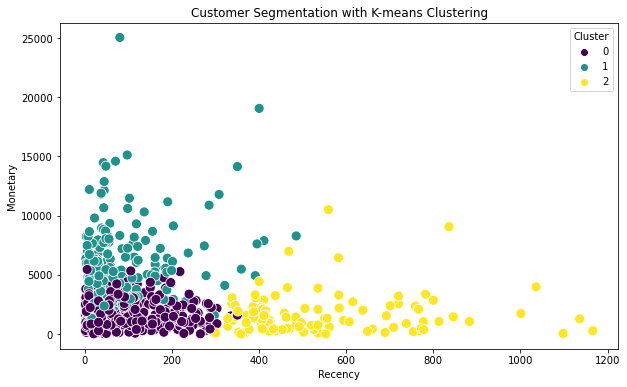

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation with K-means Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

## Product Segmentation

In [ ]:
# 5. Product Segmentation

# Group products by Product ID and calculate the sum of sales and quantity
product_df = df.groupby('Product ID').agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()

# Normalize the product data and apply K-means clustering
product_data_normalized = scaler.fit_transform(product_df[['Sales', 'Quantity']])
kmeans = KMeans(n_clusters=3, random_state=42)
product_df['Cluster'] = kmeans.fit_predict(product_data_normalized)